# Header:
I would like to implement a simple convolution neural network architecture, that consist of only convolution and transition blocks (CT) with default batch size, epoch and optimizer. <br>
<b>First convolution Block:</b> Consist of 3 convolution layers of channel size 8, 16 & 22<br>
<b>First Transition Block:</b> Consist of Max Pooling layer of 2x2 followed by 1x1 convolution of 8 channels. <br>
<b>Second Convolution Block:</b> Consist of 2 convolution layers of channel size 16 & 22 <br>
<b> Second Transition Block:  Consist of convolution layer of 10 channels with 1x1 and followed by convolution of 7x7 kernel with input to make final prediction as 10 digits. <br>

###  Change Made: 
  1.	Dynamic learning rate that gets calculated on every epoch with initial value as 0.003
  2.  Run more epochs 25.
  


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [277]:
print(y_test.shape)

(10000,)


In [278]:
print(y_train.shape)

(60000,)


(60000, 28, 28)


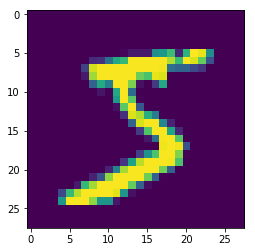

In [279]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [281]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [282]:
print(y_train[0])

5


In [283]:
print(X_test.shape)

(10000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [286]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
# Define Imports

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib  inline
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing

In [0]:
seed = 1
batch = 512

In [0]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
    )

In [0]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(X_train, seed=seed)

In [0]:
# Image normalization on entire train dataset
train_generator = train_datagen.flow(X_train, Y_train,  batch_size=batch, shuffle=True, seed=seed)

In [0]:
valid_datagen = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True    
    )

In [293]:
print(X_test.shape)

(10000, 28, 28, 1)


In [294]:
print(Y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
valid_datagen.fit(X_test,seed=seed)

In [0]:
# Image normalization on entire test dataset
valid_datagen = valid_datagen.flow(X_test, Y_test, batch_size=batch, shuffle=True, seed=seed)

In [297]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [298]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [299]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [300]:
from keras.layers import Activation
from keras import regularizers
model = Sequential()

# input: 28 output: 26 | RF: 3
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), name="conv2d_1", kernel_regularizer=regularizers.l2(0.001) ) ) 
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 26 output: 24 | RF: 5
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu', name="conv2d_2", kernel_regularizer=regularizers.l2(0.001))) # 24
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 24 output: 22 | RF: 7
model.add(BatchNormalization())
model.add(Convolution2D(22, 3, 3, activation='relu', name="conv2d_3", kernel_regularizer=regularizers.l2(0.001))) # 22
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 22 output: 11 | RF: 14
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), name = "max_pooling2d_1")) # 11
# input: 11 output: 11 | RF: 14
model.add(Convolution2D(8, 1, 1, activation='relu', name="conv2d_4", kernel_regularizer=regularizers.l2(0.001) ))# 11
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 11 output: 9 | RF: 16
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu', name="conv2d_5", kernel_regularizer=regularizers.l2(0.001))) # 9
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 9 output: 7 | RF: 18
model.add(BatchNormalization())
model.add(Convolution2D(22, 3, 3, activation='relu', name="conv2d_6", kernel_regularizer=regularizers.l2(0.001))) # 7
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 7 output: 7 | RF: 18
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu', name="conv2d_7", kernel_regularizer=regularizers.l2(0.001))) #7
#model.add(BatchNormalization())
model.add(Dropout(0.1))

# input: 7 output: 1 | RF: 25
model.add(Convolution2D(10, 7, name="conv2d_8", kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv2d_1", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="conv2d_2", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu", name="conv2d_3", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", name="conv2d_4", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your

In [301]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_113 (Dropout)        (None, 26, 26, 8)         0         
_________________________________________________________________
batch_normalization_109 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
dropout_114 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 22)        3190      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])



In [303]:
# Mount google drive to store check point model results.
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Specify gdrive path to where highest validation accuracy check point results to be stored.
import os 
checkpoint_path = "/content/gdrive/My Drive/Colab Notebooks/mnist_asign5_cnn-best_l2_img_aug_reluAfterBN.hdf5"



In [0]:
# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_best_only=True,
                                                 monitor='val_loss', 
                                                 mode='min',
                                                 period=1,
                                                 verbose=1)

In [306]:

#train_datagen.
model.fit_generator(train_generator, epochs=40, steps_per_epoch=len(X_train)/batch,
                    validation_steps=len(valid_datagen)/batch, validation_data=valid_datagen,
                    callbacks = [cp_callback])


Epoch 1/40
118/117 [==============================] - 8s 64ms/step - loss: 0.8107 - acc: 0.7704 - val_loss: 0.2799 - val_acc: 0.9375

Epoch 00001: val_loss improved from inf to 0.27988, saving model to /content/gdrive/My Drive/Colab Notebooks/mnist_asign5_cnn-best_l2_img_aug_reluAfterBN.hdf5
Epoch 2/40
118/117 [==============================] - 4s 32ms/step - loss: 0.2732 - acc: 0.9460 - val_loss: 0.2116 - val_acc: 0.9609

Epoch 00002: val_loss improved from 0.27988 to 0.21157, saving model to /content/gdrive/My Drive/Colab Notebooks/mnist_asign5_cnn-best_l2_img_aug_reluAfterBN.hdf5
Epoch 3/40
118/117 [==============================] - 4s 32ms/step - loss: 0.2099 - acc: 0.9633 - val_loss: 0.1505 - val_acc: 0.9844

Epoch 00003: val_loss improved from 0.21157 to 0.15052, saving model to /content/gdrive/My Drive/Colab Notebooks/mnist_asign5_cnn-best_l2_img_aug_reluAfterBN.hdf5
Epoch 4/40
118/117 [==============================] - 4s 32ms/step - loss: 0.1772 - acc: 0.9727 - val_loss: 0.142


### Conclusion:
#### Result: I have taken my own code from Assignement4, it has dropout and BN after ReLU implemented already.

### 1. image normaliation: After We incorporated image normalization, highest valildation accuracy achieved was 99.22
### 2. image normaliation and l2 regularization: After we  incorporated image normalization and l2 regularization, highest validation accuract achieved was 99.6
### 3. image normaliation,l2 regularization and ReLU after BN: After we  incorporated image normalization, l2 regularization and ReLU after BN , highest validation accuract achieved was 99.61

Total params: 14,528  <br>
Training Accuracy: 99.15br>
Validation Accuracy: 99.61<br>
Batch Size:512 <br>
Epoch: 40 <br>


In [0]:
# Load the model that has more validation accuracy from check point path
model.load_weights(checkpoint_path)

In [307]:
# Run evalidate againt the model that has more evaludation score
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[3.1805168707847593, 0.7556]


### To find out 25 misclassified images from the validation dataset and create an image gallery

In [308]:
# Extract all unclassified Labels

import sys
# mis-classification classlabels
incorrects_images = list(np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test))
print(type(incorrects_images))
# Get 25 misclassified class label indices
incorrect_imgs_25 = incorrects_images[0][0:25]
print(incorrect_imgs_25)

  

<class 'list'>
[ 3  6 14 15 25 28 29 37 39 40 41 42 43 46 48 53 57 64 67 74 75 82 85 86
 89]


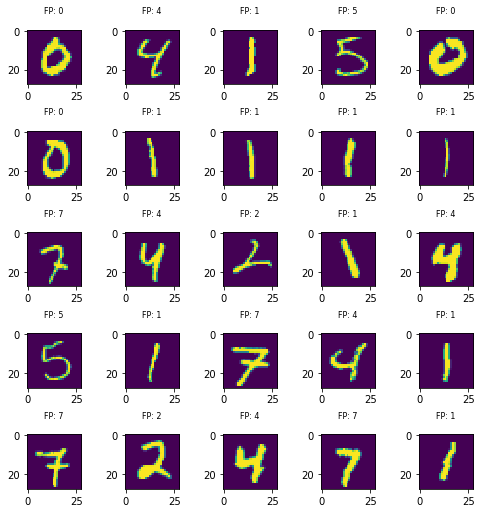

In [309]:
# Plot missclassified Images

left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.8  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.8  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
plt.figure(figsize=(8,8))
for index, (image, label) in enumerate(zip(X_test[incorrect_imgs_25], y_test[incorrect_imgs_25])):
  plt.subplot(5, 5, (index + 1))
  plt.imshow( np.reshape(image, (28,28)) )
  plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
  plt.title('FP: %i\n' % label, fontsize = 8)
  
